In [ ]:
from google.colab import files
uploaded = files.upload()


Saving train.zip.zip to train.zip (1).zip


In [ ]:
import zipfile

with zipfile.ZipFile('/content/train.zip.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')


In [ ]:
!ls /content/dataset


Cat  cats_set  Dog  dogs_set


In [ ]:
import os

# Look inside the extracted folders
print("Cat folder contents:")
print(os.listdir("/content/dataset/cats_set")[:10])  # adjust path if needed

print("\nDog folder contents:")
print(os.listdir("/content/dataset/dogs_set")[:10])


Cat folder contents:
['cat.4051.jpg', 'cat.4469.jpg', 'cat.4281.jpg', 'cat.4217.jpg', 'cat.4381.jpg', 'cat.4072.jpg', 'cat.4140.jpg', 'cat.4096.jpg', 'cat.4414.jpg', 'cat.4435.jpg']

Dog folder contents:
['dog.4451.jpg', 'dog.4279.jpg', 'dog.4137.jpg', 'dog.4487.jpg', 'dog.4003.jpg', 'dog.4385.jpg', 'dog.4328.jpg', 'dog.4444.jpg', 'dog.4255.jpg', 'dog.4243.jpg']


In [ ]:
import os

print("Inside cats_set:")
print(os.listdir("/content/dataset/cats_set")[:10])  # Check contents of cats_set

print("\nInside dogs_set:")
print(os.listdir("/content/dataset/dogs_set")[:10])  # Check contents of dogs_set


Inside cats_set:
['cat.4051.jpg', 'cat.4469.jpg', 'cat.4281.jpg', 'cat.4217.jpg', 'cat.4381.jpg', 'cat.4072.jpg', 'cat.4140.jpg', 'cat.4096.jpg', 'cat.4414.jpg', 'cat.4435.jpg']

Inside dogs_set:
['dog.4451.jpg', 'dog.4279.jpg', 'dog.4137.jpg', 'dog.4487.jpg', 'dog.4003.jpg', 'dog.4385.jpg', 'dog.4328.jpg', 'dog.4444.jpg', 'dog.4255.jpg', 'dog.4243.jpg']


In [ ]:
import shutil

from pathlib import Path

def copy_images(src_folder, dest_folder, limit=500):
    os.makedirs(dest_folder, exist_ok=True)
    count = 0
    for root, _, files in os.walk(src_folder):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                shutil.copy(os.path.join(root, file), os.path.join(dest_folder, file))
                count += 1
            if count >= limit:
                return

# Paths for your project in Colab
cat_src = "/content/dataset/cats_set"
dog_src = "/content/dataset/dogs_set"
cat_dst = "/content/dataset/Cat"
dog_dst = "/content/dataset/Dog"

# Copy 500 images each
copy_images(cat_src, cat_dst, 500)
copy_images(dog_src, dog_dst, 500)


In [ ]:
print("Cats:", len(os.listdir(cat_dst)))
print("Dogs:", len(os.listdir(dog_dst)))


Cats: 500
Dogs: 500


In [ ]:
import numpy as np
from PIL import Image
import os

# Image size
img_size = 64

def load_images_from_folder(folder, label):
    data = []
    for filename in os.listdir(folder):
        if filename.endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(folder, filename)
            try:
                img = Image.open(path).convert('RGB')
                img = img.resize((img_size, img_size))
                data.append((np.array(img).flatten(), label))
            except:
                continue
    return data

cat_data = load_images_from_folder('/content/dataset/Cat', 0)
dog_data = load_images_from_folder('/content/dataset/Dog', 1)

# Combine and shuffle
full_data = cat_data + dog_data
np.random.shuffle(full_data)

# Split into features and labels
X = np.array([item[0] for item in full_data])
y = np.array([item[1] for item in full_data])


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.535

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.59      0.53        90
           1       0.59      0.49      0.54       110

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.53       200
weighted avg       0.55      0.54      0.54       200



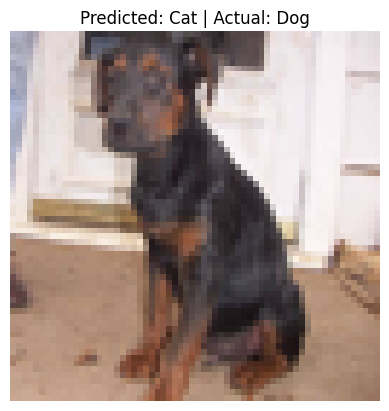

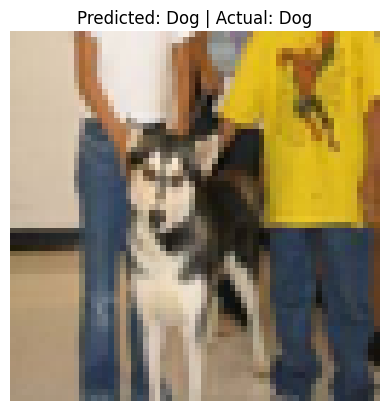

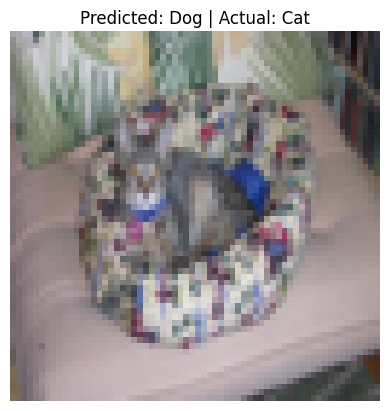

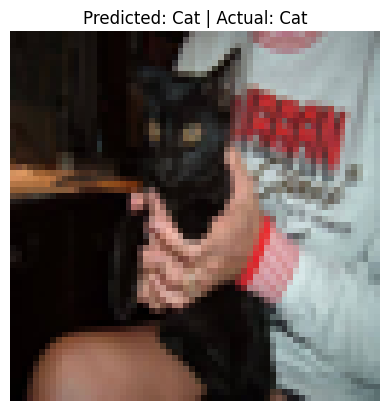

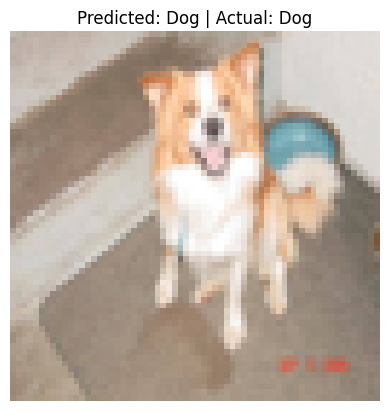

In [ ]:
import matplotlib.pyplot as plt

# Show 5 test predictions
for i in range(5):
    img = X_test[i].reshape(img_size, img_size, 3)
    plt.imshow(img.astype('uint8'))
    plt.title(f"Predicted: {'Dog' if y_pred[i] == 1 else 'Cat'} | Actual: {'Dog' if y_test[i] == 1 else 'Cat'}")
    plt.axis('off')
    plt.show()


In [ ]:
import joblib
joblib.dump(model, 'svm_cat_dog_model.pkl')


['svm_cat_dog_model.pkl']